<a href="https://colab.research.google.com/github/Skruller01/openvino/blob/master/binary_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Make a binary classification dataset with Scikit-Learn's make_moons() function.
# For consistency, the dataset should have 1000 samples and a random_state=42.
# Turn the data into PyTorch tensors. Split the data into training and test sets using train_test_split with 80% training and 20% testing.
# Build a model by subclassing nn.Module that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
# Feel free to use any combination of PyTorch layers (linear and non-linear) you want.
# Setup a binary classification compatible loss function and optimizer to use when training the model.
# Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
# To measure model accuray, you can create your own accuracy function or use the accuracy function in TorchMetrics.
# Train the model for long enough for it to reach over 96% accuracy.
# The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.
# Make predictions with your trained model and plot them using the plot_decision_boundary() function created in this notebook.
# Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.

In [17]:
import torch
from matplotlib import pyplot as plt
import sklearn
from sklearn import datasets
import numpy as np

In [18]:
from sklearn.datasets import make_moons

In [19]:
n_samples=1000
X,y=make_moons(n_samples,noise=0.03,random_state=42)
X[:5],y[:5]

(array([[-0.00933187,  0.39098105],
        [ 0.95457387, -0.47375583],
        [ 0.9185256 , -0.42519648],
        [ 0.41276802, -0.37638459],
        [-0.84532016,  0.52879908]]),
 array([1, 1, 1, 1, 0]))

In [20]:
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)
type(X),type(y),X.dtype,y.dtype

(torch.Tensor, torch.Tensor, torch.float32, torch.float32)

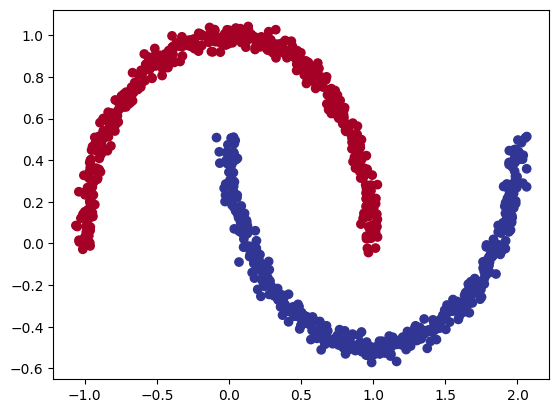

In [21]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               random_state=42)

In [23]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [24]:
from torch import nn

In [25]:
class SpiralModelV0(nn.Module):
  def __init__(self,input_features,output_features,hidden_value=8):
    super().__init__()
    self.linear_layer=nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_value),
        nn.ReLU(),
        nn.Linear(in_features=hidden_value,out_features=hidden_value),
        nn.ReLU(),
        nn.Linear(in_features=hidden_value,out_features=output_features)
    )
  def forward(self,x):
    return self.linear_layer(x)
model_0=SpiralModelV0(input_features=2,output_features=1)
model_0

SpiralModelV0(
  (linear_layer): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=1, bias=True)
  )
)

In [26]:
#creating loss and optimizer function
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.1)

In [27]:
#creating accuray function
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

In [28]:
#testing the evalution function
model_0.eval()
with torch.inference_mode():
  y_pred=model_0(X_test).sigmoid().round().squeeze()
y_pred[:5]

tensor([0., 0., 0., 0., 0.])

In [29]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [30]:
#creating training and testing loop
torch.manual_seed(42)
epochs=1000
#training
for epoch in range(epochs):
  model_0.train()
  y_logits=model_0(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid((y_logits)))
  #loss
  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  #testing
  model_0.eval()
  with torch.inference_mode():
    test_logits=model_0(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)
  if epoch % 50 == 0:
    print(f"epoch:{epoch} | train_loss:{loss:.5f} | train_acc:{acc:.2f}% | test_loss:{test_loss:.5f} | test_acc{test_acc:.2f}%")

epoch:0 | train_loss:0.71197 | train_acc:50.00% | test_loss:0.70553 | test_acc50.00%
epoch:50 | train_loss:0.61732 | train_acc:81.12% | test_loss:0.62059 | test_acc81.50%
epoch:100 | train_loss:0.36094 | train_acc:85.00% | test_loss:0.37427 | test_acc83.50%
epoch:150 | train_loss:0.26632 | train_acc:87.12% | test_loss:0.27306 | test_acc88.00%
epoch:200 | train_loss:0.23891 | train_acc:88.75% | test_loss:0.23956 | test_acc90.50%
epoch:250 | train_loss:0.22666 | train_acc:89.38% | test_loss:0.22426 | test_acc90.50%
epoch:300 | train_loss:0.21818 | train_acc:89.62% | test_loss:0.21428 | test_acc91.00%
epoch:350 | train_loss:0.20901 | train_acc:90.00% | test_loss:0.20423 | test_acc91.00%
epoch:400 | train_loss:0.19766 | train_acc:90.75% | test_loss:0.19220 | test_acc92.00%
epoch:450 | train_loss:0.18329 | train_acc:91.75% | test_loss:0.17750 | test_acc93.00%
epoch:500 | train_loss:0.16549 | train_acc:92.38% | test_loss:0.15952 | test_acc93.00%
epoch:550 | train_loss:0.14459 | train_acc:94.

In [31]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


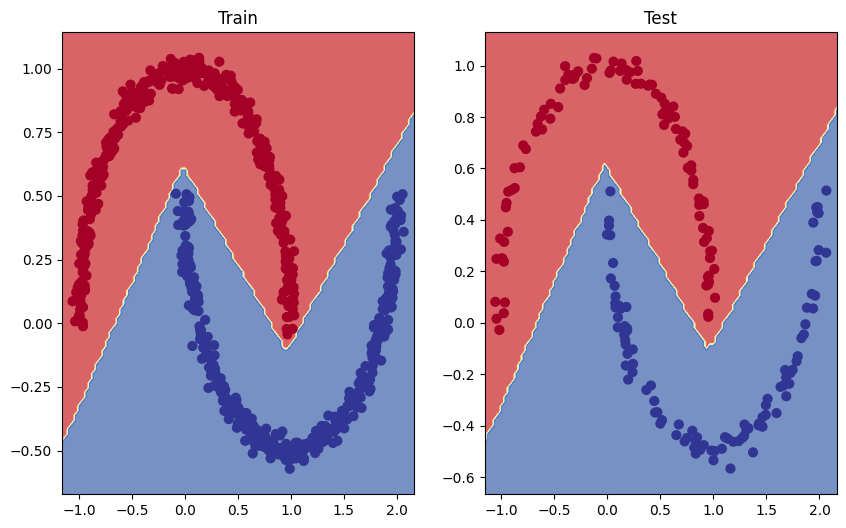

In [32]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)